In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('tracks.csv')
df

,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,...,track_information,track_interest,track_language_code,track_license,track_listens,track_lyricist,track_number,track_publisher,track_tags,track_title
0,2,0,2008-11-26 1:44,2009-01-05 0:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
1,3,0,2008-11-26 1:44,2009-01-05 0:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
2,5,0,2008-11-26 1:44,2009-01-05 0:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
3,10,0,2008-11-26 1:45,2008-02-06 0:00,NaN,4,6,NaN,47632,NaN,...,NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
4,20,0,2008-11-26 1:45,2009-01-06 0:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,...,NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106566,155316,0,2017-03-30 15:20,2017-02-17 0:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,122,NaN,Creative Commons Attribution-NonCommercial-NoD...,102,NaN,3,NaN,[],The Auger
106567,155317,0,2017-03-30 15:20,2017-02-17 0:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,194,NaN,Creative Commons Attribution-NonCommercial-NoD...,165,NaN,4,NaN,[],Let's Skin Ruby
106568,155318,0,2017-03-30 15:20,2017-02-17 0:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,214,NaN,Creative Commons Attribution-NonCommercial-NoD...,168,NaN,6,NaN,[],My House Smells Like Kim Deal/Pulp
106569,155319,0,2017-03-30 15:20,2017-02-17 0:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,336,NaN,Creative Commons Attribution-NonCommercial-NoD...,294,NaN,5,NaN,[],The Man With Two Mouths


In [3]:
df.columns

Index(['track_id', 'album_comments', 'album_date_created',
       'album_date_released', 'album_engineer', 'album_favorites', 'album_id',
       'album_information', 'album_listens', 'album_producer', 'album_tags',
       'album_title', 'album_tracks', 'album_type', 'artist_active_year_begin',
       'artist_active_year_end', 'artist_associated_labels', 'artist_bio',
       'artist_comments', 'artist_date_created', 'artist_favorites',
       'artist_id', 'artist_latitude', 'artist_location', 'artist_longitude',
       'artist_members', 'artist_name', 'artist_related_projects',
       'artist_tags', 'artist_website', 'artist_wikipedia_page', 'set_split',
       'set_subset', 'track_bit_rate', 'track_comments', 'track_composer',
       'track_date_created', 'track_date_recorded', 'track_duration',
       'track_favorites', 'track_genre_top', 'track_genres',
       'track_genres_all', 'track_information', 'track_interest',
       'track_language_code', 'track_license', 'track_listens',
  

In [4]:
df[['track_genre_top','track_genres','track_genres_all']]

,track_genre_top,track_genres,track_genres_all
0,Hip-Hop,[21],[21]
1,Hip-Hop,[21],[21]
2,Hip-Hop,[21],[21]
3,Pop,[10],[10]
4,NaN,"[76, 103]","[17, 10, 76, 103]"
...,...,...,...
106566,Rock,[25],"[25, 12]"
106567,Rock,[25],"[25, 12]"
106568,Rock,[25],"[25, 12]"
106569,Rock,[25],"[25, 12]"


In [5]:
df['track_genre_top'].value_counts()

Rock                   14182
Experimental           10605
Electronic              9372
Hip-Hop                 3552
Folk                    2803
Pop                     2332
Instrumental            2079
International           1389
Classical               1230
Jazz                     571
Old-Time / Historic      554
Spoken                   423
Country                  194
Soul-RnB                 175
Blues                    110
Easy Listening            24
Name: track_genre_top, dtype: int64

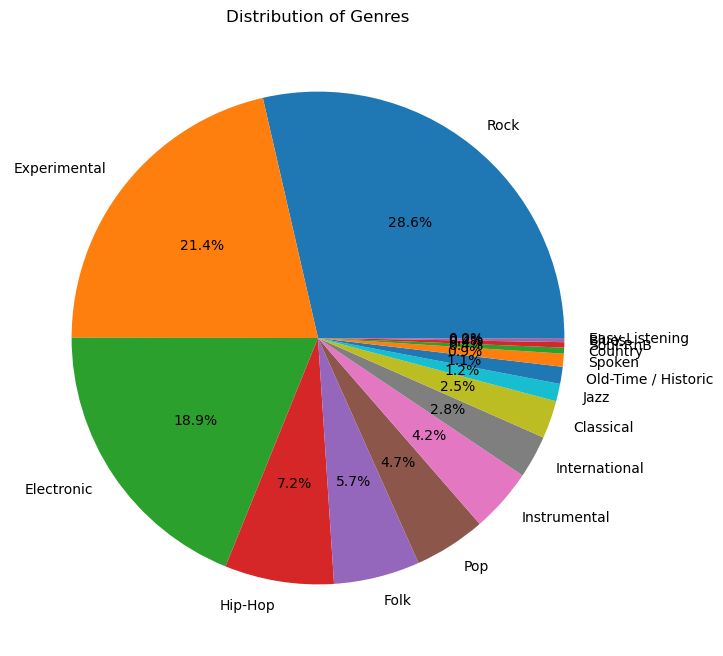

In [6]:
plt.figure(figsize=(10,8))
plt.pie(df['track_genre_top'].value_counts(), labels = df['track_genre_top'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Genres')
plt.show()

In [7]:
filename = []
name = ''

for i in df['track_id']:
    if i > 156000:
        break 
    
    folder = str(i // 1000).zfill(3)
    
    if len(str(i // 1000))==1:
        name = f'fma_medium/{folder}/000{i}.mp3'
    if len(str(i // 1000))==2:
        name = f'fma_medium/{folder}/0{i}.mp3'
    if len(str(i // 1000))==3:
        name = f'fma_medium/{folder}/{i}.mp3'
    
    filename.append(name)

In [8]:
df.loc[:, 'filename'] = filename
df

,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,...,track_interest,track_language_code,track_license,track_listens,track_lyricist,track_number,track_publisher,track_tags,track_title,filename
0,2,0,2008-11-26 1:44,2009-01-05 0:00,NaN,4,1,<p></p>,6073,NaN,...,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food,fma_medium/000/0002.mp3
1,3,0,2008-11-26 1:44,2009-01-05 0:00,NaN,4,1,<p></p>,6073,NaN,...,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave,fma_medium/000/0003.mp3
2,5,0,2008-11-26 1:44,2009-01-05 0:00,NaN,4,1,<p></p>,6073,NaN,...,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World,fma_medium/000/0005.mp3
3,10,0,2008-11-26 1:45,2008-02-06 0:00,NaN,4,6,NaN,47632,NaN,...,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway,fma_medium/000/00010.mp3
4,20,0,2008-11-26 1:45,2009-01-06 0:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,...,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level,fma_medium/000/00020.mp3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106566,155316,0,2017-03-30 15:20,2017-02-17 0:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,122,NaN,Creative Commons Attribution-NonCommercial-NoD...,102,NaN,3,NaN,[],The Auger,fma_medium/155/155316.mp3
106567,155317,0,2017-03-30 15:20,2017-02-17 0:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,194,NaN,Creative Commons Attribution-NonCommercial-NoD...,165,NaN,4,NaN,[],Let's Skin Ruby,fma_medium/155/155317.mp3
106568,155318,0,2017-03-30 15:20,2017-02-17 0:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,214,NaN,Creative Commons Attribution-NonCommercial-NoD...,168,NaN,6,NaN,[],My House Smells Like Kim Deal/Pulp,fma_medium/155/155318.mp3
106569,155319,0,2017-03-30 15:20,2017-02-17 0:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,336,NaN,Creative Commons Attribution-NonCommercial-NoD...,294,NaN,5,NaN,[],The Man With Two Mouths,fma_medium/155/155319.mp3


In [9]:
import os

def verify_file_exists(file_path):
    return os.path.exists(file_path)

results = df['filename'].apply(verify_file_exists)

In [10]:
existing_files = df[results]
existing_files

,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,...,track_interest,track_language_code,track_license,track_listens,track_lyricist,track_number,track_publisher,track_tags,track_title,filename
9,134,0,2008-11-26 1:44,2009-01-05 0:00,NaN,4,1,<p></p>,6073,NaN,...,1126,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,943,NaN,5,NaN,[],Street Music,fma_medium/000/000134.mp3
11,136,1,2008-11-26 1:49,2009-01-07 0:00,NaN,0,58,<p>A couple of unreleased mp3s from the fellas...,3331,NaN,...,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky,fma_medium/000/000136.mp3
14,139,0,2008-11-26 1:49,2009-01-16 0:00,NaN,1,60,"<p>A full ensamble of strings, drums, electron...",1304,NaN,...,702,en,Attribution-Noncommercial-No Derivative Works ...,582,NaN,2,NaN,[],CandyAss,fma_medium/000/000139.mp3
15,140,1,2008-11-26 1:49,2007-05-22 0:00,NaN,1,61,<p>Alec K. Redfearn &amp; The Eyesores: Ellen ...,1300,"Alec K. Refearn, Rob Pemberton",...,1593,en,Attribution-Noncommercial-No Derivative Works ...,1299,NaN,2,NaN,[],Queen Of The Wires,fma_medium/000/000140.mp3
16,141,0,2008-11-26 1:49,2009-01-16 0:00,NaN,1,60,"<p>A full ensamble of strings, drums, electron...",1304,NaN,...,839,en,Attribution-Noncommercial-No Derivative Works ...,725,NaN,4,NaN,[],Ohio,fma_medium/000/000141.mp3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106548,155297,0,2017-03-30 9:50,2017-03-30 0:00,NaN,1,22935,<p>The stars will show you the way in this unp...,6196,NaN,...,1463,NaN,Attribution-NonCommercial,1049,NaN,9,NaN,[],Nebula Reborn,fma_medium/155/155297.mp3
106549,155298,0,2017-03-30 10:45,NaN,NaN,0,22936,NaN,2454,NaN,...,706,NaN,Attribution,590,NaN,2,NaN,[],An Idiot Abroad,fma_medium/155/155298.mp3
106557,155306,0,2017-03-30 10:45,NaN,NaN,0,22936,NaN,2454,NaN,...,497,NaN,Attribution,435,NaN,1,NaN,[],Tiny Man,fma_medium/155/155306.mp3
106558,155307,0,2017-03-30 12:51,2017-03-27 0:00,Scott Williams,0,22937,<p>Scott welcomes Russian revolutionary avant ...,1206,Scott Williams,...,630,NaN,Creative Commons Attribution-NonCommercial-NoD...,571,NaN,1,NaN,[],Kolka,fma_medium/155/155307.mp3


In [11]:
existing_files[['track_genre_top']].value_counts()

track_genre_top    
Rock                   6483
Electronic             6196
Hip-Hop                2155
Experimental           2145
Folk                   1401
Instrumental           1350
Pop                    1163
International           927
Classical               637
Old-Time / Historic     485
Jazz                    346
Country                 157
Soul-RnB                152
Spoken                  111
Blues                    61
Easy Listening           21
dtype: int64

In [12]:
df_prev = existing_files[['artist_name','track_title','track_genre_top','filename']]
df_prev = df_prev.rename(columns={'artist_name': 'Artist', 
                                  'track_title': 'Song', 
                                  'track_genre_top': 'Genre', 
                                  'filename':'Filename'})
df_prev

,Artist,Song,Genre,Filename
9,AWOL,Street Music,Hip-Hop,fma_medium/000/000134.mp3
11,Abominog,Peel Back The Mountain Sky,Rock,fma_medium/000/000136.mp3
14,Alec K. Redfearn & the Eyesores,CandyAss,Folk,fma_medium/000/000139.mp3
15,Alec K. Redfearn & the Eyesores,Queen Of The Wires,Folk,fma_medium/000/000140.mp3
16,Alec K. Redfearn & the Eyesores,Ohio,Folk,fma_medium/000/000141.mp3
...,...,...,...,...
106548,Alex Mason/BlackSunAeon Music,Nebula Reborn,Instrumental,fma_medium/155/155297.mp3
106549,Greg Atkinson,An Idiot Abroad,Folk,fma_medium/155/155298.mp3
106557,Greg Atkinson,Tiny Man,Folk,fma_medium/155/155306.mp3
106558,AWOTT,Kolka,Experimental,fma_medium/155/155307.mp3


In [13]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

def extract_music_data(url,gen):

    response = requests.get(url)

    soup = BeautifulSoup(response.content, 'html.parser')

    table = soup.find('table', {'class': 'music'})
    info = []
    for row in table.find_all('tr')[1:]:  # skip the header row
        cols = row.find_all('td')
        genre = gen
        artist_name = cols[1].text.strip()
        song_name = cols[2].text.strip()
        info.append({'Artist': artist_name, 'Song': song_name, 'Genre': genre})

    # Create a Pandas DataFrame from the extracted data
    df_extra = pd.DataFrame(info)

    # Use Selenium to extract audio URLs
    driver = webdriver.Chrome()  # Make sure you have the Chrome driver installed
    driver.get(url)
    time.sleep(3)  # Wait for the page to load completely
    audio_elements = driver.find_elements(By.TAG_NAME, 'audio')
    audio_urls = []
    for audio in audio_elements:
        source = audio.get_attribute('src')
        if source:
            audio_urls.append(source)
        ## In case not an MP3 file
        # import numpy as np
        # else:
        #     audio_urls.append(float('nan'))
    driver.quit()

    # Add the audio URLs to the DataFrame
    df_extra['url'] = audio_urls

    return df_extra

In [14]:
info_scrap = [
    ("Blues", "https://cs.uwaterloo.ca/~dtompkin/music/genre/mbgenre2.html"),
    ("Children", "https://cs.uwaterloo.ca/~dtompkin/music/genre/mbgenre13.html"),
    ("Christmas", "https://cs.uwaterloo.ca/~dtompkin/music/genre/mbgenre21.html"),
    ("Comedy", "https://cs.uwaterloo.ca/~dtompkin/music/genre/mbgenre33.html"),
    ("Country", "https://cs.uwaterloo.ca/~dtompkin/music/genre/mbgenre38.html"),
    ("Jazz", "https://cs.uwaterloo.ca/~dtompkin/music/genre/mbgenre62.html"),
    ("R&B", "https://cs.uwaterloo.ca/~dtompkin/music/genre/mbgenre90.html"),
    ("Rap", "https://cs.uwaterloo.ca/~dtompkin/music/genre/mbgenre100.html"),
    ("Reggae", "https://cs.uwaterloo.ca/~dtompkin/music/genre/mbgenre106.html"),
    ("Soul", "https://cs.uwaterloo.ca/~dtompkin/music/genre/mbgenre130.html"),
]

df_all = pd.DataFrame()  # Initialize an empty DataFrame to store all the data

for genre, url in info_scrap:
    df_1 = extract_music_data(url, genre)
    df_all = pd.concat([df_all, df_1])  # Concatenate the DataFrames

In [15]:
df_all

,Artist,Song,Genre,url
0,Kirsty Hawkshaw,A Fine Day,Blues,https://cs.uwaterloo.ca/~dtompkin/music/sample...
1,Alicia Keys,A Woman's Worth,Blues,https://cs.uwaterloo.ca/~dtompkin/music/sample...
2,Puretone,Addicted to Bass [John Creamer Mix],Blues,https://cs.uwaterloo.ca/~dtompkin/music/sample...
3,Little Game Featuring Pitbull & Amp,Addictiv,Blues,https://cs.uwaterloo.ca/~dtompkin/music/sample...
4,Nelly Featuring Ali & Kyjuan & Murphy Lee,Air Force Ones,Blues,https://cs.uwaterloo.ca/~dtompkin/music/sample...
...,...,...,...,...
26,Smokey Robinson and The Miracles,The Tears of a Clown,Soul,https://cs.uwaterloo.ca/~dtompkin/music/sample...
27,Marvin Gaye,Too Busy Thinking About My Baby,Soul,https://cs.uwaterloo.ca/~dtompkin/music/sample...
28,Diana Ross,Touch Me in the Morning,Soul,https://cs.uwaterloo.ca/~dtompkin/music/sample...
29,The Supremes,Up The Ladder To The Roof,Soul,https://cs.uwaterloo.ca/~dtompkin/music/sample...


In [17]:
def extract_filename(url):
    return url.split('/')[-1]

df_all['Filename'] = df_all['url'].apply(extract_filename)
df_all

,Artist,Song,Genre,url,Filename
0,Kirsty Hawkshaw,A Fine Day,Blues,https://cs.uwaterloo.ca/~dtompkin/music/sample...,sample-MASSIVE__204-13.mp3
1,Alicia Keys,A Woman's Worth,Blues,https://cs.uwaterloo.ca/~dtompkin/music/sample...,sample-GROOVEST_008-04.mp3
2,Puretone,Addicted to Bass [John Creamer Mix],Blues,https://cs.uwaterloo.ca/~dtompkin/music/sample...,sample-MCLUB202_004-02.mp3
3,Little Game Featuring Pitbull & Amp,Addictiv,Blues,https://cs.uwaterloo.ca/~dtompkin/music/sample...,sample-CHRRADIO_128-04.mp3
4,Nelly Featuring Ali & Kyjuan & Murphy Lee,Air Force Ones,Blues,https://cs.uwaterloo.ca/~dtompkin/music/sample...,sample-RADIO203_01A-05.mp3
...,...,...,...,...,...
26,Smokey Robinson and The Miracles,The Tears of a Clown,Soul,https://cs.uwaterloo.ca/~dtompkin/music/sample...,sample-ESSENTLS_002-08.mp3
27,Marvin Gaye,Too Busy Thinking About My Baby,Soul,https://cs.uwaterloo.ca/~dtompkin/music/sample...,sample-DTRANDOM_033-14.mp3
28,Diana Ross,Touch Me in the Morning,Soul,https://cs.uwaterloo.ca/~dtompkin/music/sample...,sample-DTRANDOM_024-06.mp3
29,The Supremes,Up The Ladder To The Roof,Soul,https://cs.uwaterloo.ca/~dtompkin/music/sample...,sample-DTRANDOM_033-13.mp3


In [18]:
df_final = pd.concat([df_prev,df_all])
df_final

,Artist,Song,Genre,Filename,url
9,AWOL,Street Music,Hip-Hop,fma_medium/000/000134.mp3,NaN
11,Abominog,Peel Back The Mountain Sky,Rock,fma_medium/000/000136.mp3,NaN
14,Alec K. Redfearn & the Eyesores,CandyAss,Folk,fma_medium/000/000139.mp3,NaN
15,Alec K. Redfearn & the Eyesores,Queen Of The Wires,Folk,fma_medium/000/000140.mp3,NaN
16,Alec K. Redfearn & the Eyesores,Ohio,Folk,fma_medium/000/000141.mp3,NaN
...,...,...,...,...,...
26,Smokey Robinson and The Miracles,The Tears of a Clown,Soul,sample-ESSENTLS_002-08.mp3,https://cs.uwaterloo.ca/~dtompkin/music/sample...
27,Marvin Gaye,Too Busy Thinking About My Baby,Soul,sample-DTRANDOM_033-14.mp3,https://cs.uwaterloo.ca/~dtompkin/music/sample...
28,Diana Ross,Touch Me in the Morning,Soul,sample-DTRANDOM_024-06.mp3,https://cs.uwaterloo.ca/~dtompkin/music/sample...
29,The Supremes,Up The Ladder To The Roof,Soul,sample-DTRANDOM_033-13.mp3,https://cs.uwaterloo.ca/~dtompkin/music/sample...


In [19]:
df_final['Genre'].nunique()

23

In [20]:
df_final['Genre'].value_counts()

Rock                   6483
Electronic             6196
Hip-Hop                2155
Experimental           2145
Folk                   1401
Instrumental           1350
Country                1257
Jazz                   1197
Pop                    1163
International           927
Classical               637
R&B                     565
Old-Time / Historic     485
Christmas               476
Rap                     320
Blues                   243
Soul-RnB                152
Comedy                  125
Reggae                  123
Spoken                  111
Children                 54
Soul                     31
Easy Listening           21
Name: Genre, dtype: int64

In [21]:
def sample_from_each_label(df, label_column, n_samples_per_label):
    return df.groupby(label_column, group_keys=False).apply(lambda x: x.sample(min(len(x), n_samples_per_label)))

n_samples = 320
final_df = sample_from_each_label(df_final, df_final['Genre'], n_samples)

In [22]:
final_df['Genre'].value_counts()

Instrumental           320
Pop                    320
Christmas              320
Classical              320
Rock                   320
Country                320
Rap                    320
Electronic             320
Experimental           320
Folk                   320
Hip-Hop                320
R&B                    320
International          320
Jazz                   320
Old-Time / Historic    320
Blues                  243
Soul-RnB               152
Comedy                 125
Reggae                 123
Spoken                 111
Children                54
Soul                    31
Easy Listening          21
Name: Genre, dtype: int64

In [23]:
genres_to_remove = ['', 'Blues','Comedy', 'Soul-RnB', 'Spoken','Reggae','Children','Soul','Easy Listening']
final_df = final_df[~final_df['Genre'].isin(genres_to_remove)]

In [24]:
final_df['Genre'].value_counts()

Christmas              320
Classical              320
Country                320
Electronic             320
Experimental           320
Folk                   320
Hip-Hop                320
Instrumental           320
International          320
Jazz                   320
Old-Time / Historic    320
Pop                    320
R&B                    320
Rap                    320
Rock                   320
Name: Genre, dtype: int64

In [25]:
final_df

,Artist,Song,Genre,Filename,url
64,John Denver & The Muppets,Christmas Is Coming,Christmas,sample-DTRANDOM_019-17.mp3,https://cs.uwaterloo.ca/~dtompkin/music/sample...
358,Bing Crosby,Silent Night,Christmas,sample-POWERTRK_125-02.mp3,https://cs.uwaterloo.ca/~dtompkin/music/sample...
2,Nat King Cole,A House With Love in It,Christmas,sample-XMSELECT_GOF-13.mp3,https://cs.uwaterloo.ca/~dtompkin/music/sample...
305,Edwin Hawkins Singers,Oh Happy Day,Christmas,sample-DTRANDOM_013-07.mp3,https://cs.uwaterloo.ca/~dtompkin/music/sample...
404,Nancy Wilson,That's What I Want for Christmas,Christmas,sample-XMHIPHOL_003-10.mp3,https://cs.uwaterloo.ca/~dtompkin/music/sample...
...,...,...,...,...,...
29369,Wetnurse,Not Your Choice,Rock,fma_medium/044/044276.mp3,NaN
27842,Lockerbie,Sumar (intro),Rock,fma_medium/042/042310.mp3,NaN
51854,Shearer,Fist on a wall,Rock,fma_medium/075/075684.mp3,NaN
66651,Pampers,Shot,Rock,fma_medium/099/099417.mp3,NaN


In [26]:
final_df.to_csv('final_dataset.csv', index=False)